In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [2]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp
import sorf_lib as sf

In [3]:
sns.set_context('talk')
sns.set_style('white')


![](http://oregonstate.edu/instruct/bb450/fall14/stryer7/2/table_02_02.jpg)

https://www.uniprot.org/uniprot/Q7V735

http://tigrfams.jcvi.org/cgi-bin/HmmReportPage.cgi?acc=TIGR03798

https://www.ebi.ac.uk/training/online/course/interpro-functional-and-structural-analysis-protei/sequence-searching/searching-interpro-batc

http://www.ebi.ac.uk/interpro/sequencesearch/iprscan5-S20190707-131508-0462-76111813-p1m

https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/iprscan5-S20190707-131508-0462-76111813-p1m/json

In [4]:
oorder = ['Intergenic', 'Antisense', 'Out of Frame','In Frame',  'Annotated', ]
opalette = sns.color_palette("rainbow", 5).as_hex()
#del opalette[4]

In [5]:
dpath = 'orffinder_tmp'
summary_suffix = '.sorf.summary.csv.gz'
sorf_result_suffix = '.sorf.pkl.gz'

In [6]:
genome = 'MED4'

In [7]:
genome_df = pd.read_pickle(os.path.join('data', f'{genome}.ncbi.gb.pkl.gz'))


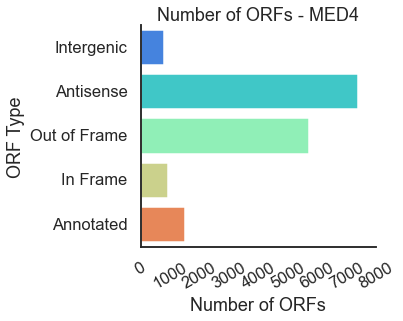

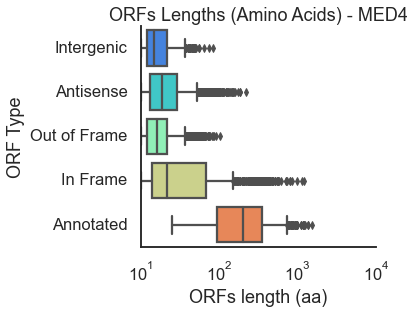

In [8]:
omap = {'standalone' : 'Intergenic', 
        'out_frame' : 'Out of Frame', 
        'antisense' : 'Antisense', 
        'in_frame' :'In Frame', 
        'known' : 'Annotated'}

genome = 'MED4'
df = pd.read_pickle(os.path.join('orffinder_tmp', f'{genome}.ncbi.sorf.pkl.gz'))
df = df.loc[df.otype != 'overlap']
df.otype = df.otype.map(omap)
    
sns.catplot(data=df, y='otype', kind='count', aspect=1.4, height=4,
       order=oorder, palette=opalette
           )
plt.xticks(rotation=30) 
plt.ylabel('ORF Type')
plt.xlabel('Number of ORFs')
plt.title(f'Number of ORFs - {genome}')

sns.catplot(data=df, y='otype', x='len_aa', aspect=1.4, height=4,
        kind='box',
       order=oorder, palette=opalette
           )
plt.xscale('log')
plt.ylabel('ORF Type')
plt.xlabel('ORFs length (aa)')

plt.title(f'ORFs Lengths (Amino Acids) - {genome}')
plt.show()
    

In [9]:
genome_df.head()

,contig_id,gene_id,pmt_id,type,location,strand,start,stop,left,right,function,genome,old_locus_tag,product,db_xref,protein_id,figfam,nucleotide_sequence,aa_sequence
0,MED4,PMM0001,,CDS,PMM0001,+,173,1331,173,1331,"DNA polymerase III, beta chain",MED4,,"DNA polymerase III, beta chain","EnsemblGenomes-Gn:PMM0001,EnsemblGenomes-Tr:CA...",CAE18460.1,,,MEIVCNQNEFNYAIQLVSKAVASRPTHPILANLLLTADQGTNKISL...
1,MED4,PMM0002,,CDS,PMM0002,+,1332,2040,1332,2040,conserved hypothetical protein,MED4,,conserved hypothetical protein,"EnsemblGenomes-Gn:PMM0002,EnsemblGenomes-Tr:CA...",CAE18461.1,,,MKLPKEFLLSELLRHNVKGNATLNYGKGENVWMHPPVHRILGWYSR...
2,MED4,PMM0003,,CDS,PMM0003,+,2043,4383,2043,4383,phosphoribosylformylglycinamidine synthetase II,MED4,,phosphoribosylformylglycinamidine synthetase II,"EnsemblGenomes-Gn:PMM0003,EnsemblGenomes-Tr:CA...",CAE18462.1,,,MIDSSSNNTYDVNESLKVENLTRDDYEEICKRLGRKPNRTELGMFG...
3,MED4,PMM0004,,CDS,PMM0004,+,4429,5890,4429,5890,Glutamine amidotransferase class-II:Phosphorib...,MED4,,Glutamine amidotransferase class-II:Phosphorib...,"EnsemblGenomes-Gn:PMM0004,EnsemblGenomes-Tr:CA...",CAE18463.1,,,MCGIVGIVSCDDVNQQIYDSLLLLQHRGQDSTGIATMENTVFHIHK...
4,MED4,PMM0005,,CDS,PMM0005,-,5886,8328,5886,8328,"DNA gyrase/topoisomerase IV, subunit A",MED4,,"DNA gyrase/topoisomerase IV, subunit A","EnsemblGenomes-Gn:PMM0005,EnsemblGenomes-Tr:CA...",CAE18464.1,,,MTKEKFTSISLQEEMQRSYLEYAMSVIIGRALPDARDGLKPVQRRI...


In [10]:
df.loc[:,'merge_location'] = df['location']
df.loc[df['location'].isna(), 'merge_location'] = df.loc[df['location'].isna(), 'overlap_location']
df1 = pd.merge(df, genome_df, how='left', left_on='merge_location', right_on='location', suffixes=['', '_overlap'])

In [11]:
df1.loc[df1.otype == 'Annotated'].head().T

,2,21,28,46,51
orfid,ORF3_BX548174.1:2043:4382,ORF22_BX548174.1:16017:16682,ORF29_BX548174.1:18282:19001,ORF48_BX548174.1:27846:28352,ORF54_BX548174.1:32334:32531
contig,BX548174.1,BX548174.1,BX548174.1,BX548174.1,BX548174.1
left,2043,16017,18282,27846,32334
right,4382,16682,19001,28352,32531
start,2043,16017,18282,27846,32334
stop,4382,16682,19001,28352,32531
strand,+,+,+,+,+
aaseq,MIDSSSNNTYDVNESLKVENLTRDDYEEICKRLGRKPNRTELGMFG...,MYMNYLISSFYLGYYFKVEFQVSIFVGNLPFRAEREDILELFTPYG...,MIEKQSDNVENLEDNVSQEVNKNEDSSVIENQTSEDKQTLEVDDEN...,MAMKLDHDDLDRLIEKISTSDIQEFSLEGEDFKLEIKRNLFDQNHL...,MASQISYRGNKNPIKKKLSFFEGGHQLEKLEFALAVAQTKGDEQKS...
len_nn,2340,666,720,507,198
len_aa,779,221,239,168,65


In [12]:
df.head()

,orfid,contig,left,right,start,stop,strand,aaseq,len_nn,len_aa,...,overlap_gene_type,overlap_count,is_same_strand,is_out_of_frame,is_inside,is_upstream,is_downstream,overlap_type,otype,merge_location
0,ORF1_BX548174.1:699:812,BX548174.1,699,812,699,812,+,MGIDWLLFWLITKKILMKKKILLQMKKTYQLLYQQDL,114,37,...,CDS,1,1.0,1.0,1.0,0.0,0.0,internal_out_frame,Out of Frame,PMM0001
1,ORF2_BX548174.1:1428:2039,BX548174.1,1428,2039,1428,2039,+,MHPPVHRILGWYSRPSNLDLKRNVWKLNQISQIIDNDIFVKGNPAI...,612,203,...,CDS,1,1.0,0.0,1.0,0.0,0.0,internal,In Frame,PMM0002
2,ORF3_BX548174.1:2043:4382,BX548174.1,2043,4382,2043,4382,+,MIDSSSNNTYDVNESLKVENLTRDDYEEICKRLGRKPNRTELGMFG...,2340,779,...,CDS,1,NaN,NaN,NaN,NaN,NaN,known,Annotated,PMM0003
3,ORF4_BX548174.1:5163:5201,BX548174.1,5163,5201,5163,5201,+,MLRKPKVISLCF,39,12,...,CDS,1,1.0,0.0,1.0,0.0,0.0,internal,In Frame,PMM0004
4,ORF5_BX548174.1:6072:6113,BX548174.1,6072,6113,6072,6113,+,MVIFKLHFLIYIT,42,13,...,CDS,1,0.0,1.0,1.0,0.0,0.0,as_internal_out_frame,Antisense,PMM0005


In [13]:
df.columns

Index(['orfid', 'contig', 'left', 'right', 'start', 'stop', 'strand', 'aaseq',
       'len_nn', 'len_aa', 'len_aa3', 'rast_left', 'rast_right', 'contig_id',
       'gene_id', 'location', 'type', 'start_r', 'stop_r', 'function',
       'figfam', 'nucleotide_sequence', 'aa_sequence', 'genome', 'left_r',
       'right_r', 'overlap_location', 'overlap_strand', 'overlap_gene_type',
       'overlap_count', 'is_same_strand', 'is_out_of_frame', 'is_inside',
       'is_upstream', 'is_downstream', 'overlap_type', 'otype',
       'merge_location'],
      dtype='object')

In [14]:
genome_df.columns

Index(['contig_id', 'gene_id', 'pmt_id', 'type', 'location', 'strand', 'start',
       'stop', 'left', 'right', 'function', 'genome', 'old_locus_tag',
       'product', 'db_xref', 'protein_id', 'figfam', 'nucleotide_sequence',
       'aa_sequence'],
      dtype='object')

In [15]:
df.otype.value_counts()

Antisense       7381
Out of Frame    5715
Annotated       1495
In Frame         931
Intergenic       798
Name: otype, dtype: int64

In [16]:
annotated_orfs = df.loc[df.otype.isin(['Annotated']), 'gene_id']

In [17]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

#simple_seq = Seq("GATC")
#simple_seq_r = SeqRecord(simple_seq)

In [18]:
def row2record(row):
    #print(row)
    s = Seq(row.aa_sequence)
    record = SeqRecord(s, id=row.gene_id, description=row.function) 
    return record
genome_recs = [row2record(row)
               for i, row in genome_df.loc[
                   ~genome_df.gene_id.isin(annotated_orfs) & genome_df.type.isin(['CDS']), 
                   ['gene_id', 'aa_sequence', 'function']
               ].iterrows() ]


In [19]:
df.otype.value_counts()


Antisense       7381
Out of Frame    5715
Annotated       1495
In Frame         931
Intergenic       798
Name: otype, dtype: int64

In [20]:
df.loc[~df.otype.isin(['In Frame'])].otype.value_counts()

Antisense       7381
Out of Frame    5715
Annotated       1495
Intergenic       798
Name: otype, dtype: int64

In [21]:
def is_in_orf_id(r):
    orfid = r.id.replace('lcl|','')
    # ignore in frame - will just cause noise
    return df.loc[~df.otype.isin(['In Frame']), 'orfid'].isin([orfid]).sum() > 0
accession = sf.get_accession(genome)
orf_dpath = 'orffinder_tmp'
orf_fpath = os.path.join(orf_dpath, f'{accession}.orffinder.fa')


In [22]:
from Bio import SeqIO
records = [r for r in SeqIO.parse(orf_fpath, "fasta") if is_in_orf_id(r)]

In [23]:
len(records), len(genome_recs), len(records + genome_recs)

(15389, 465, 15854)

In [24]:
out_fpath = os.path.join(orf_dpath, f'{genome}_orfs_db.fasta')
count = SeqIO.write(records + genome_recs, out_fpath, "fasta")
print("Saved %i records from %s to %s" % (count, orf_fpath, out_fpath))

Saved 15854 records from orffinder_tmp\BX548174.orffinder.fa to orffinder_tmp\MED4_orfs_db.fasta
